In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
import urllib.robotparser as urobot
from urllib.request import urlopen
from pylab import rcParams
import csv
import math

%matplotlib inline

In [2]:
#Load both list_of_champs table & prospects'

df1 = pd.read_csv('../data/list_of_champs.csv')
df2 = pd.read_csv('../data/Top50_prospects.csv')
df2 = df2.dropna(axis=1)
df2

,Rank,Name,Weight Class,Record,Age,Fighting Style,Company,Country,Nickname,Title Holder
0,1,Vadim Nemkov,Light Heavyweight,11-2,27,Wrestling,Bellator,Russia,Unknown,Prospect
1,2,Lance Palmer,Featherweight,22-3,32,Wrestling,PFL,USA,Unknown,Prospect
2,3,A.J. McKee,Featherweight,16-0,25,Wrestling,Bellator,USA,Unknown,Prospect
3,4,Natan Schulte,Lightweight,20-3-1,28,Jiu-Jitsu,PFL,Brazil,Russo,Prospect
4,5,Darrion Caldwell,Featherweight,15-3,32,Wrestling,Bellator,USA,Unknown,Prospect
5,6,Jiri Prochazka,Light Heavyweight,26-3-1,27,Boxing,UFC,Czech republic,Unknown,Prospect
6,7,Valentin Moldavsky,Heavyweight,10-1,28,"Sambo, MMA",Bellator,Russia,Unknown,Prospect
7,8,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,31,Wrestling,ACA,Russia,Lion,Prospect
8,9,Tomasz Narkun,Light Heavyweight,18-3,30,Jiu-Jitsu,KSW,Poland,Giraffe,Prospect
9,10,Pedro Carvalho,Featherweight,11-4,24,Jiu-Jitsu,Bellator,Portugal,The Game,Prospect


In [3]:
df2.dtypes

Rank               int64
 Name             object
 Weight Class     object
 Record           object
Age                int64
Fighting Style    object
Company           object
Country           object
Nickname          object
Title Holder      object
dtype: object

In [4]:
###Adjust df2 to match up with the list of champs before joining both tables###

df2 = pd.read_csv('../data/Top50_prospects.csv', usecols = [' Weight Class',
                                                            ' Name',
                                                            ' Record',
                                                            'Fighting Style',
                                                            'Country',
                                                            'Nickname',
                                                            'Title Holder'])
df2

,Name,Weight Class,Record,Fighting Style,Country,Nickname,Title Holder
0,Vadim Nemkov,Light Heavyweight,11-2,Wrestling,Russia,Unknown,Prospect
1,Lance Palmer,Featherweight,22-3,Wrestling,USA,Unknown,Prospect
2,A.J. McKee,Featherweight,16-0,Wrestling,USA,Unknown,Prospect
3,Natan Schulte,Lightweight,20-3-1,Jiu-Jitsu,Brazil,Russo,Prospect
4,Darrion Caldwell,Featherweight,15-3,Wrestling,USA,Unknown,Prospect
5,Jiri Prochazka,Light Heavyweight,26-3-1,Boxing,Czech republic,Unknown,Prospect
6,Valentin Moldavsky,Heavyweight,10-1,"Sambo, MMA",Russia,Unknown,Prospect
7,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,Wrestling,Russia,Lion,Prospect
8,Tomasz Narkun,Light Heavyweight,18-3,Jiu-Jitsu,Poland,Giraffe,Prospect
9,Pedro Carvalho,Featherweight,11-4,Jiu-Jitsu,Portugal,The Game,Prospect


In [5]:
## Since df2 only showcases the top50 'MALE' MMA prospects, I'll add a 'Sex' colummn to clarify my analysis later on btw male prospects vs champs

df2['Sex'] = 'Male'
df2

,Name,Weight Class,Record,Fighting Style,Country,Nickname,Title Holder,Sex
0,Vadim Nemkov,Light Heavyweight,11-2,Wrestling,Russia,Unknown,Prospect,Male
1,Lance Palmer,Featherweight,22-3,Wrestling,USA,Unknown,Prospect,Male
2,A.J. McKee,Featherweight,16-0,Wrestling,USA,Unknown,Prospect,Male
3,Natan Schulte,Lightweight,20-3-1,Jiu-Jitsu,Brazil,Russo,Prospect,Male
4,Darrion Caldwell,Featherweight,15-3,Wrestling,USA,Unknown,Prospect,Male
5,Jiri Prochazka,Light Heavyweight,26-3-1,Boxing,Czech republic,Unknown,Prospect,Male
6,Valentin Moldavsky,Heavyweight,10-1,"Sambo, MMA",Russia,Unknown,Prospect,Male
7,Abdul-Aziz Abdulvakhabov,Lightweight,18-2,Wrestling,Russia,Lion,Prospect,Male
8,Tomasz Narkun,Light Heavyweight,18-3,Jiu-Jitsu,Poland,Giraffe,Prospect,Male
9,Pedro Carvalho,Featherweight,11-4,Jiu-Jitsu,Portugal,The Game,Prospect,Male


In [6]:
## Now, let's merge both tables = combined list

df3 = pd.merge(df1, df2, how = 'outer')
df3

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder
0,Heavyweight\n,Mark Coleman\n,Male,16-10,Wrestling,USA,The Hammer,Former
1,Heavyweight\n,Maurice Smith\n,Male,14-14,Kickboxing,USA,Mo,Former
2,Heavyweight\n,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former
3,Heavyweight\n,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former
4,Heavyweight\n,Bas Rutten\n,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former
...,...,...,...,...,...,...,...,...
164,Light Heavyweight,Nasrudin Nasrudinov,Male,9-0,Wrestling,Russia,Unknown,Prospect
165,Middleweight,Vladimir Mineev,Male,13-1-1,Kickboxing,Russia,Unknown,Prospect
166,Bantamweight,Patrick Mix,Male,13-0,"Wrestling, Jiu-Jitsu",USA,No Love,Prospect
167,Lightweight,Soren Bak,Male,13-1,"Wrestling, Thai Boxing",Unknown,The True Viking,Prospect


In [7]:
df3.tail()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder
164,Light Heavyweight,Nasrudin Nasrudinov,Male,9-0,Wrestling,Russia,Unknown,Prospect
165,Middleweight,Vladimir Mineev,Male,13-1-1,Kickboxing,Russia,Unknown,Prospect
166,Bantamweight,Patrick Mix,Male,13-0,"Wrestling, Jiu-Jitsu",USA,No Love,Prospect
167,Lightweight,Soren Bak,Male,13-1,"Wrestling, Thai Boxing",Unknown,The True Viking,Prospect
168,Lightweight,Khusein Khaliev,Male,19-2,Wrestling,Russia,Captain,Prospect


In [8]:
# Remove "\n" on both weight class, name columns

df3[' Weight Class'] = df3[' Weight Class'].str.strip()
df3.head()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder
0,Heavyweight,Mark Coleman\n,Male,16-10,Wrestling,USA,The Hammer,Former
1,Heavyweight,Maurice Smith\n,Male,14-14,Kickboxing,USA,Mo,Former
2,Heavyweight,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former
3,Heavyweight,Randy Couture\n,Male,19-11,Wrestling,USA,The Natural,Former
4,Heavyweight,Bas Rutten\n,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former


In [9]:
df3[' Name'] = df3[' Name'].str.strip()
df3.head()

,Weight Class,Name,Sex,Record,Fighting Style,Country,Nickname,Title Holder
0,Heavyweight,Mark Coleman,Male,16-10,Wrestling,USA,The Hammer,Former
1,Heavyweight,Maurice Smith,Male,14-14,Kickboxing,USA,Mo,Former
2,Heavyweight,Randy Couture,Male,19-11,Wrestling,USA,The Natural,Former
3,Heavyweight,Randy Couture,Male,19-11,Wrestling,USA,The Natural,Former
4,Heavyweight,Bas Rutten,Male,28-4,"Kickboxing, Wrestling",Netherlands,El Guapo (The Handsome One),Former


In [10]:
#Let's split the record column into two more descriptive 'Wins' & 'Losses' columns

split = lambda x:pd.Series([i for i in (x.split('-'))])

In [11]:
Record_df = df3[' Record'].apply(split)
Record_df

,0,1,2
0,16,10,NaN
1,14,14,NaN
2,19,11,NaN
3,19,11,NaN
4,28,4,NaN
...,...,...,...
164,9,0,NaN
165,13,1,1
166,13,0,NaN
167,13,1,NaN


In [12]:
Record_df.columns = ['Wins',
                     'Losses',
                     'Draws']

Record_df.head(2)

,Wins,Losses,Draws
0,16,10,NaN
1,14,14,NaN


In [13]:
Record_df = Record_df.drop(['Draws'], axis=1)

In [14]:
df4 = pd.concat([Record_df, df3], axis = 1)

In [15]:
# Reorder columns and remove extra space at the beginning of 'Weight Class' and Record columns
df4.columns = ['Wins', 'Losses', 'Weight Class', 'Name', 'Sex', 'Record',
       'Fighting Style', 'Country', 'Nickname', 'Title Holder']

In [16]:
df4[['Name', 'Weight Class', 'Wins', 'Losses', 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder']]
df4 = df4[['Name', 'Weight Class', 'Wins', 'Losses', 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder']]
df4

,Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark Coleman,Heavyweight,16,10,Wrestling,Male,USA,The Hammer,Former
1,Maurice Smith,Heavyweight,14,14,Kickboxing,Male,USA,Mo,Former
2,Randy Couture,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former
3,Randy Couture,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former
4,Bas Rutten,Heavyweight,28,4,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
...,...,...,...,...,...,...,...,...,...
164,Nasrudin Nasrudinov,Light Heavyweight,9,0,Wrestling,Male,Russia,Unknown,Prospect
165,Vladimir Mineev,Middleweight,13,1,Kickboxing,Male,Russia,Unknown,Prospect
166,Patrick Mix,Bantamweight,13,0,"Wrestling, Jiu-Jitsu",Male,USA,No Love,Prospect
167,Soren Bak,Lightweight,13,1,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect


In [17]:
#Split the name columns into first and last names

split = lambda x:pd.Series([i for i in (x.split(' '))])

In [18]:
Name_df = df4['Name'].apply(split)
Name_df

,0,1,2,3,4
0,Mark,Coleman,NaN,NaN,NaN
1,Maurice,Smith,NaN,NaN,NaN
2,Randy,Couture,NaN,NaN,NaN
3,Randy,Couture,NaN,NaN,NaN
4,Bas,Rutten,NaN,NaN,NaN
...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,NaN,NaN
165,Vladimir,Mineev,NaN,NaN,NaN
166,Patrick,Mix,NaN,NaN,NaN
167,Soren,Bak,NaN,NaN,NaN


In [19]:
Name_df.columns = ['First Name',
                   'Last Name',
                   'Interim Title Holder',
                   'n/a',
                   'n/a']

Name_df.head(2)

,First Name,Last Name,Interim Title Holder,n/a,n/a
0,Mark,Coleman,NaN,NaN,NaN
1,Maurice,Smith,NaN,NaN,NaN


In [20]:
Name_df = Name_df.drop(['n/a'], axis=1)
Name_df

,First Name,Last Name,Interim Title Holder
0,Mark,Coleman,NaN
1,Maurice,Smith,NaN
2,Randy,Couture,NaN
3,Randy,Couture,NaN
4,Bas,Rutten,NaN
...,...,...,...
164,Nasrudin,Nasrudinov,NaN
165,Vladimir,Mineev,NaN
166,Patrick,Mix,NaN
167,Soren,Bak,NaN


In [21]:
#remove "("

Name_df['Interim Title Holder'] = Name_df['Interim Title Holder'].str.strip('(')
Name_df.tail()

<ipython-input-21-c23243f857d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Name_df['Interim Title Holder'] = Name_df['Interim Title Holder'].str.strip('(')


,First Name,Last Name,Interim Title Holder
164,Nasrudin,Nasrudinov,NaN
165,Vladimir,Mineev,NaN
166,Patrick,Mix,NaN
167,Soren,Bak,NaN
168,Khusein,Khaliev,NaN


In [22]:
df5 = pd.concat([Name_df, df4], axis = 1)
df5

,First Name,Last Name,Interim Title Holder,Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark,Coleman,NaN,Mark Coleman,Heavyweight,16,10,Wrestling,Male,USA,The Hammer,Former
1,Maurice,Smith,NaN,Maurice Smith,Heavyweight,14,14,Kickboxing,Male,USA,Mo,Former
2,Randy,Couture,NaN,Randy Couture,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former
3,Randy,Couture,NaN,Randy Couture,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former
4,Bas,Rutten,NaN,Bas Rutten,Heavyweight,28,4,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
...,...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,Nasrudin Nasrudinov,Light Heavyweight,9,0,Wrestling,Male,Russia,Unknown,Prospect
165,Vladimir,Mineev,NaN,Vladimir Mineev,Middleweight,13,1,Kickboxing,Male,Russia,Unknown,Prospect
166,Patrick,Mix,NaN,Patrick Mix,Bantamweight,13,0,"Wrestling, Jiu-Jitsu",Male,USA,No Love,Prospect
167,Soren,Bak,NaN,Soren Bak,Lightweight,13,1,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect


In [23]:
df5 = df5.drop(['Name'], axis=1)
df5

,First Name,Last Name,Interim Title Holder,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder
0,Mark,Coleman,NaN,Heavyweight,16,10,Wrestling,Male,USA,The Hammer,Former
1,Maurice,Smith,NaN,Heavyweight,14,14,Kickboxing,Male,USA,Mo,Former
2,Randy,Couture,NaN,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former
3,Randy,Couture,NaN,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former
4,Bas,Rutten,NaN,Heavyweight,28,4,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former
...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,NaN,Light Heavyweight,9,0,Wrestling,Male,Russia,Unknown,Prospect
165,Vladimir,Mineev,NaN,Middleweight,13,1,Kickboxing,Male,Russia,Unknown,Prospect
166,Patrick,Mix,NaN,Bantamweight,13,0,"Wrestling, Jiu-Jitsu",Male,USA,No Love,Prospect
167,Soren,Bak,NaN,Lightweight,13,1,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect


In [24]:
# Reorder & record columns
df5.columns = ['First Name', 'Last Name', 'Interim Title Holder', 'Weight Class', 'Wins', 'Losses', 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder']

In [25]:
df5[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder', 'Interim Title Holder']]
df5 = df5[['First Name', 'Last Name', 'Weight Class', 'Wins', 'Losses', 'Fighting Style', 'Sex', 'Country', 'Nickname', 'Title Holder', 'Interim Title Holder']]
df5

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
0,Mark,Coleman,Heavyweight,16,10,Wrestling,Male,USA,The Hammer,Former,NaN
1,Maurice,Smith,Heavyweight,14,14,Kickboxing,Male,USA,Mo,Former,NaN
2,Randy,Couture,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former,NaN
3,Randy,Couture,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former,NaN
4,Bas,Rutten,Heavyweight,28,4,"Kickboxing, Wrestling",Male,Netherlands,El Guapo (The Handsome One),Former,NaN
...,...,...,...,...,...,...,...,...,...,...,...
164,Nasrudin,Nasrudinov,Light Heavyweight,9,0,Wrestling,Male,Russia,Unknown,Prospect,NaN
165,Vladimir,Mineev,Middleweight,13,1,Kickboxing,Male,Russia,Unknown,Prospect,NaN
166,Patrick,Mix,Bantamweight,13,0,"Wrestling, Jiu-Jitsu",Male,USA,No Love,Prospect,NaN
167,Soren,Bak,Lightweight,13,1,"Wrestling, Thai Boxing",Male,Unknown,The True Viking,Prospect,NaN


In [26]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   First Name            169 non-null    object
 1   Last Name             169 non-null    object
 2   Weight Class          169 non-null    object
 3   Wins                  169 non-null    object
 4   Losses                169 non-null    object
 5   Fighting Style        169 non-null    object
 6   Sex                   169 non-null    object
 7   Country               167 non-null    object
 8   Nickname              169 non-null    object
 9   Title Holder          169 non-null    object
 10  Interim Title Holder  15 non-null     object
dtypes: object(11)
memory usage: 15.8+ KB


In [27]:
df5.describe

<bound method NDFrame.describe of     First Name   Last Name       Weight Class Wins Losses  \
0         Mark     Coleman        Heavyweight   16     10   
1      Maurice       Smith        Heavyweight   14     14   
2        Randy     Couture        Heavyweight   19     11   
3        Randy     Couture        Heavyweight   19     11   
4          Bas      Rutten        Heavyweight   28     4    
..         ...         ...                ...  ...    ...   
164   Nasrudin  Nasrudinov  Light Heavyweight    9      0   
165   Vladimir      Mineev       Middleweight   13      1   
166    Patrick         Mix       Bantamweight   13      0   
167      Soren         Bak        Lightweight   13      1   
168    Khusein     Khaliev        Lightweight   19      2   

             Fighting Style   Sex      Country                     Nickname  \
0                 Wrestling  Male          USA                   The Hammer   
1                Kickboxing  Male          USA                           Mo

In [28]:
df5.dtypes

First Name              object
Last Name               object
Weight Class            object
Wins                    object
Losses                  object
Fighting Style          object
Sex                     object
Country                 object
Nickname                object
Title Holder            object
Interim Title Holder    object
dtype: object

In [29]:
#Convert both 'Wins' and 'Losses' columns to integers

df5['Wins'] = df5.Wins.astype(int)
df5['Losses'] = df5.Losses.astype(int)

In [30]:
df5.dtypes

First Name              object
Last Name               object
Weight Class            object
Wins                     int32
Losses                   int32
Fighting Style          object
Sex                     object
Country                 object
Nickname                object
Title Holder            object
Interim Title Holder    object
dtype: object

In [31]:
df5.describe(include=[np.number])

,Wins,Losses
count,169.000000,169.000000
mean,20.715976,5.591716
std,7.819529,4.918883
min,4.000000,0.000000
25%,16.000000,2.000000
50%,19.000000,4.000000
75%,26.000000,9.000000
max,54.000000,27.000000


([<matplotlib.axis.XTick at 0x2228adebbe0>], [Text(0, 0, 'First Name')])

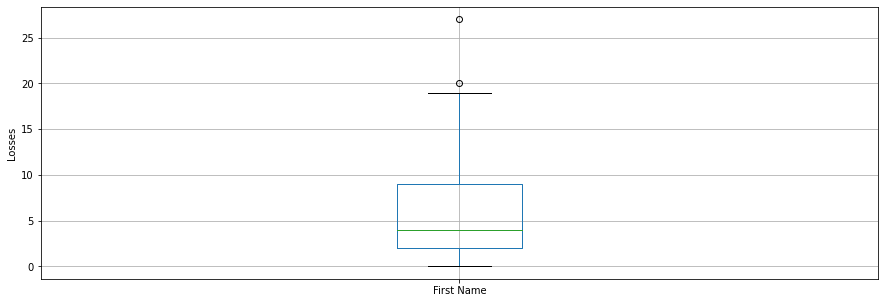

In [32]:
# The losses distribution is abnormal among the entire list of champs & prospects

rcParams['figure.figsize'] = 15,5

df5.boxplot(column='Losses')
plt.grid(True, axis='y')
plt.ylabel('Losses')
plt.xticks([1], ['First Name'])

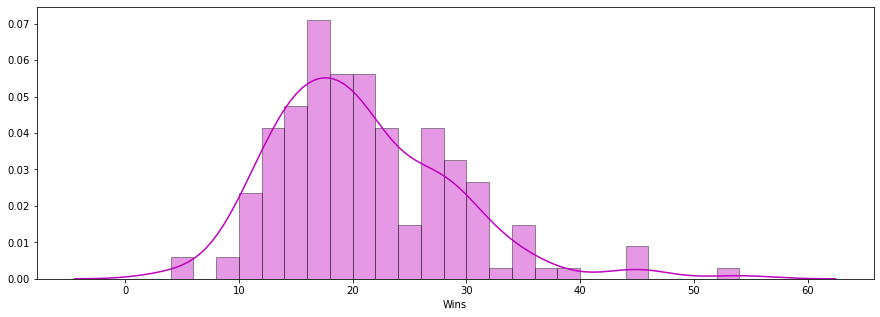

In [33]:
#distribution of wins

x = df5['Wins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

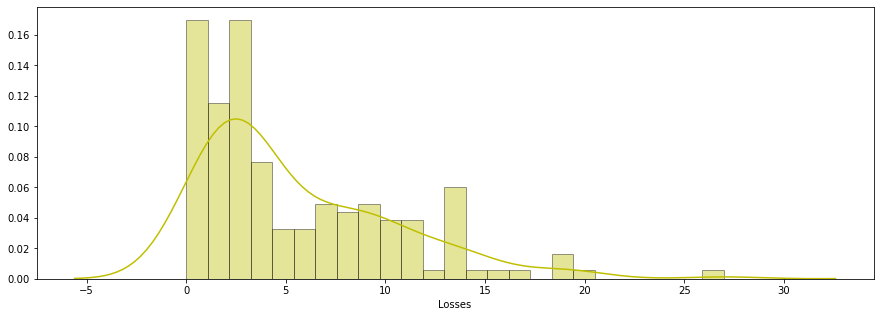

In [34]:
#distribution of losses in our dataframe

x = df5['Losses']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='y', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

In [35]:
#EDA- examine the current title holders with duplicated names showing either the ones who used to be Interim Champs or won the belt twice'

Current_champs = df5[df5['Title Holder'] == 'Current']
Current_champs

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
23,Stipe,Miocic,Heavyweight,20,3,Wresling,Male,USA,Unknown,Current,NaN
25,Stipe,Miocic,Heavyweight,20,3,Wresling,Male,USA,Unknown,Current,NaN
42,Jan,Blachowicz,Light Heavyweight,27,8,Jiu-Jitsu,Male,Poland,Prince of Cieszyn,Current,NaN
54,Israel,Adesanya,Middleweight,20,0,"Kickboxing, Boxing",Male,Nigeria,The Last Stylebender,Current,interim
55,Israel,Adesanya,Middleweight,20,0,"Kickboxing, Boxing",Male,NaN,The Last Stylebender,Current,NaN
70,Kamaru,Usman,Welterweight,17,1,Wrestling,Male,Nigeria,The Nigerian Nightmare,Current,NaN
81,Khabib,Nurmagomedov,Lightweight,29,0,Sambo,Male,Russia,The Eagle,Current,NaN
82,Khabib,Nurmagomedov,Lightweight,29,0,Sambo,Male,Russia,The Eagle,Current,NaN
101,Petr,Yan,Bantamweight,15,1,"Boxing, Muay thai",Male,Russia,No Mercy,Current,NaN
104,Deiveson,Figueiredo,Flyweight,20,1,Jiu-Jitsu,Male,Brazil,Daico,Current,NaN


In [36]:
Current_champs['Title Holder'].value_counts

<bound method IndexOpsMixin.value_counts of 23     Current
25     Current
42     Current
54     Current
55     Current
70     Current
81     Current
82     Current
101    Current
104    Current
107    Current
111    Current
113    Current
118    Current
Name: Title Holder, dtype: object>

In [37]:
Current_champs.drop([25,54,82])

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder
23,Stipe,Miocic,Heavyweight,20,3,Wresling,Male,USA,Unknown,Current,NaN
42,Jan,Blachowicz,Light Heavyweight,27,8,Jiu-Jitsu,Male,Poland,Prince of Cieszyn,Current,NaN
55,Israel,Adesanya,Middleweight,20,0,"Kickboxing, Boxing",Male,NaN,The Last Stylebender,Current,NaN
70,Kamaru,Usman,Welterweight,17,1,Wrestling,Male,Nigeria,The Nigerian Nightmare,Current,NaN
81,Khabib,Nurmagomedov,Lightweight,29,0,Sambo,Male,Russia,The Eagle,Current,NaN
101,Petr,Yan,Bantamweight,15,1,"Boxing, Muay thai",Male,Russia,No Mercy,Current,NaN
104,Deiveson,Figueiredo,Flyweight,20,1,Jiu-Jitsu,Male,Brazil,Daico,Current,NaN
107,Amanda,Nunes,Featherweight,20,4,Jiu-Jitsu,Female,Brazil,The Lioness,Current,NaN
111,Amanda,Nunes,Bantamweight,20,4,Jiu-Jitsu,Female,Brazil,The Lioness,Current,NaN
113,Valentina,Shevchenko,Flyweight,20,3,"Muay thai, Taekwondo",Female,Kyrgyzstan,Bullet,Current,NaN


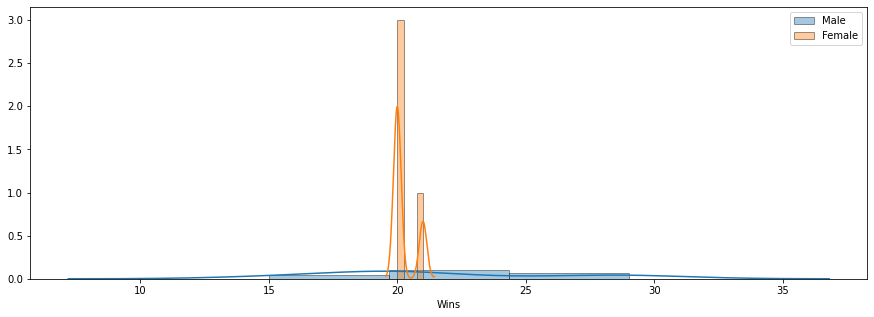

In [38]:
#Performance difference between Males and females champs "CURRENT ONLY"

m_fighters = Current_champs.loc[Current_champs['Sex']=='Male']['Wins']
f_fighters = Current_champs.loc[Current_champs['Sex']=='Female']['Wins']
sns.distplot(m_fighters, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
sns.distplot(f_fighters, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
plt.legend()

In [39]:
#Average wins for both males and females is 20 wins, and losses 3.5 (females) and 1 (males)

gender_stats = Current_champs.groupby("Sex", as_index=True).describe()
print(gender_stats)

        Wins                                                 Losses       \
       count   mean       std   min   25%   50%    75%   max  count mean   
Sex                                                                        
Female   4.0  20.25  0.500000  20.0  20.0  20.0  20.25  21.0    4.0  3.0   
Male    10.0  21.70  4.900113  15.0  20.0  20.0  25.25  29.0   10.0  1.7   

                                           
             std  min  25%  50%  75%  max  
Sex                                        
Female  1.414214  1.0  2.5  3.5  4.0  4.0  
Male    2.496664  0.0  0.0  1.0  2.5  8.0  


In [40]:
division_stats = Current_champs.groupby("Weight Class", as_index=True).describe()
print(division_stats)

                   Wins                                                  \
                  count  mean       std   min    25%   50%    75%   max   
Weight Class                                                              
Bantamweight        2.0  17.5  3.535534  15.0  16.25  17.5  18.75  20.0   
Featherweight       1.0  20.0       NaN  20.0  20.00  20.0  20.00  20.0   
Flyweight           2.0  20.0  0.000000  20.0  20.00  20.0  20.00  20.0   
Heavyweight         2.0  20.0  0.000000  20.0  20.00  20.0  20.00  20.0   
Light Heavyweight   1.0  27.0       NaN  27.0  27.00  27.0  27.00  27.0   
Lightweight         2.0  29.0  0.000000  29.0  29.00  29.0  29.00  29.0   
Middleweight        2.0  20.0  0.000000  20.0  20.00  20.0  20.00  20.0   
Strawweight         1.0  21.0       NaN  21.0  21.00  21.0  21.00  21.0   
Welterweight        1.0  17.0       NaN  17.0  17.00  17.0  17.00  17.0   

                  Losses                                            
                   count mean 

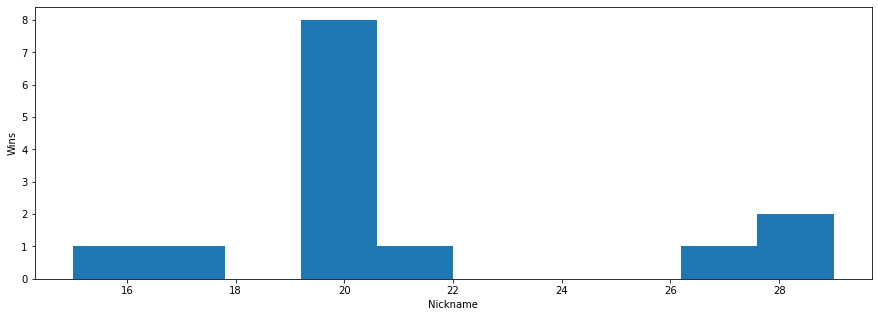

In [41]:
#Let's look at the wins' distribution among current champions.

#Most current champions have at least 20 wins, the least is 15 wins

plt.hist (Current_champs['Wins'], bins = 10)
plt.xlabel('Nickname')
plt.ylabel('Wins');

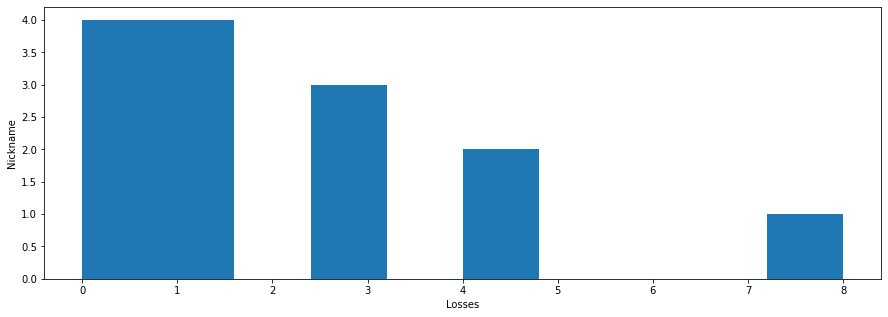

In [42]:
#Let's look at the losses' distribution among current champions.

#Most current champions have either 0 to 1 loss and maximum 8 losses

plt.hist (Current_champs['Losses'], bins = 10)
plt.xlabel('Losses')
plt.ylabel('Nickname');

In [43]:
# Let's do a win/loss ratio to filter out the unqualified prospect by adding a new ratio column
# Any ratio above one is considered "favorable"

df5['success_ratio'] = df5['Wins'] / df5['Losses']
df5.head(3)

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
0,Mark,Coleman,Heavyweight,16,10,Wrestling,Male,USA,The Hammer,Former,NaN,1.600000
1,Maurice,Smith,Heavyweight,14,14,Kickboxing,Male,USA,Mo,Former,NaN,1.000000
2,Randy,Couture,Heavyweight,19,11,Wrestling,Male,USA,The Natural,Former,NaN,1.727273


In [44]:
#Let's look at the fighters with the "Top" success ratio ("0" losses)

df5 = df5.sort_values(by = 'success_ratio', ascending = False)
df5

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
54,Israel,Adesanya,Middleweight,20,0,"Kickboxing, Boxing",Male,Nigeria,The Last Stylebender,Current,interim,inf
154,Shavkat,Rakhmonov,Lightweight,12,0,Sambo,Male,Uzbekistan,Nomad,Prospect,NaN,inf
82,Khabib,Nurmagomedov,Lightweight,29,0,Sambo,Male,Russia,The Eagle,Current,NaN,inf
121,A.J.,McKee,Featherweight,16,0,Wrestling,Male,USA,Unknown,Prospect,NaN,inf
81,Khabib,Nurmagomedov,Lightweight,29,0,Sambo,Male,Russia,The Eagle,Current,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
57,Carlos,Newton,Welterweight,16,14,"Jiu-Jitsu, Wrestling, Judo, Boxing",Male,Canada,The Ronin,Former,NaN,1.142857
73,B.J.,Penn,Lightweight,16,14,Jiu-Jitsu,Male,USA,The Prodigy,Former,NaN,1.142857
60,B.J.,Penn,Welterweight,16,14,Jiu-Jitsu,Male,USA,The Prodigy,Former,NaN,1.142857
5,Kevin,Randleman,Heavyweight,17,16,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN,1.062500


In [45]:
# Drill down to the prospects with a favorable success ratio (establish a Df first)

Prospects = df5[df5['Title Holder'] == 'Prospect']
Prospects

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
154,Shavkat,Rakhmonov,Lightweight,12,0,Sambo,Male,Uzbekistan,Nomad,Prospect,NaN,inf
121,A.J.,McKee,Featherweight,16,0,Wrestling,Male,USA,Unknown,Prospect,NaN,inf
136,Salahdine,Parnasse,Featherweight,14,0,"Wrestling, Kickboxing",Male,France,Unknown,Prospect,NaN,inf
140,Yaroslav,Amosov,Welterweight,23,0,Sambo,Male,Ukraine,Dynamo,Prospect,NaN,inf
139,Logan,Storley,Welterweight,11,0,Wrestling,Male,USA,Storm,Prospect,NaN,inf
166,Patrick,Mix,Bantamweight,13,0,"Wrestling, Jiu-Jitsu",Male,USA,No Love,Prospect,NaN,inf
164,Nasrudin,Nasrudinov,Light Heavyweight,9,0,Wrestling,Male,Russia,Unknown,Prospect,NaN,inf
160,Islam,Mamedov,Lightweight,19,1,Wrestling,Male,Russia,Unknown,Prospect,NaN,19.000000
129,Michael,Page,Welterweight,17,1,"Kickboxing, Karate",Male,England,Venom,Prospect,NaN,17.000000
155,Yusuf,Raisov,Lightweight,16,1,Jiu-Jitsu,Male,Russia,Borz,Prospect,NaN,16.000000


In [46]:
Prospects = Prospects.sort_values(by = 'success_ratio', ascending = False)
Prospects

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
154,Shavkat,Rakhmonov,Lightweight,12,0,Sambo,Male,Uzbekistan,Nomad,Prospect,NaN,inf
136,Salahdine,Parnasse,Featherweight,14,0,"Wrestling, Kickboxing",Male,France,Unknown,Prospect,NaN,inf
140,Yaroslav,Amosov,Welterweight,23,0,Sambo,Male,Ukraine,Dynamo,Prospect,NaN,inf
139,Logan,Storley,Welterweight,11,0,Wrestling,Male,USA,Storm,Prospect,NaN,inf
166,Patrick,Mix,Bantamweight,13,0,"Wrestling, Jiu-Jitsu",Male,USA,No Love,Prospect,NaN,inf
164,Nasrudin,Nasrudinov,Light Heavyweight,9,0,Wrestling,Male,Russia,Unknown,Prospect,NaN,inf
121,A.J.,McKee,Featherweight,16,0,Wrestling,Male,USA,Unknown,Prospect,NaN,inf
160,Islam,Mamedov,Lightweight,19,1,Wrestling,Male,Russia,Unknown,Prospect,NaN,19.000000
129,Michael,Page,Welterweight,17,1,"Kickboxing, Karate",Male,England,Venom,Prospect,NaN,17.000000
155,Yusuf,Raisov,Lightweight,16,1,Jiu-Jitsu,Male,Russia,Borz,Prospect,NaN,16.000000


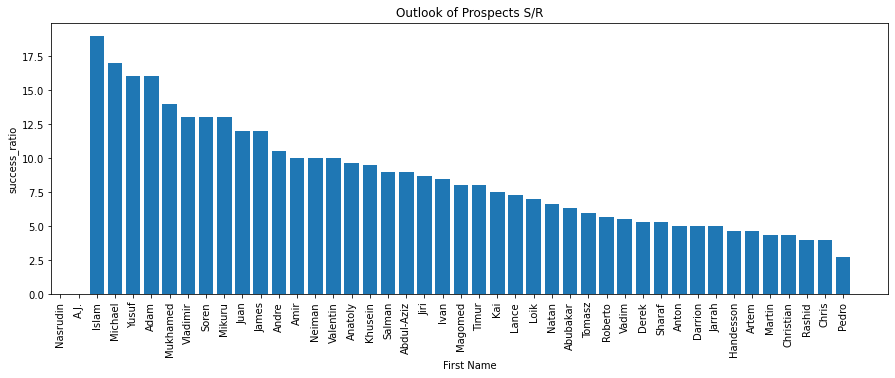

In [53]:
plt.bar(Prospects['First Name'], Prospects['success_ratio'])
plt.xlabel('First Name')
plt.xticks(rotation=90)
plt.ylabel('success_ratio')
plt.title('Outlook of Prospects S/R')

plt.show()

C:\Users\jbtch\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\jbtch\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\jbtch\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\jbtch\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\jbtch\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


Text(0.5, 0.98, '')

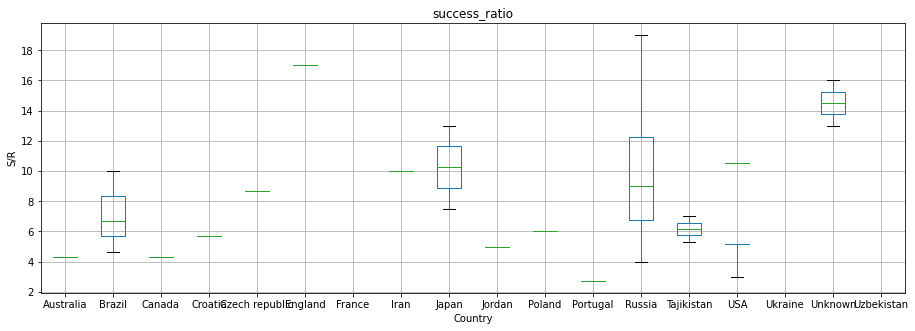

In [48]:
Prospects.boxplot(column = 'success_ratio', by='Country')
plt.ylabel('S/R')
plt.suptitle("")

In [49]:
# Let's look at all the current champs with a positive success ratio 

df5['success_ratio'] >= 1 
df5['success_ratio']

54          inf
154         inf
82          inf
121         inf
81          inf
         ...   
57     1.142857
73     1.142857
60     1.142857
5      1.062500
1      1.000000
Name: success_ratio, Length: 169, dtype: float64

In [50]:
former_champs = df5[df5['Title Holder'] == 'Former']
former_champs

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
39,Jon,Jones,Light Heavyweight,26,1,Wrestling,Male,USA,Bones,Former,NaN,26.000000
41,Jon,Jones,Light Heavyweight,26,1,Wrestling,Male,USA,Bones,Former,NaN,26.000000
38,Jon,Jones,Light Heavyweight,26,1,Wrestling,Male,USA,Bones,Former,NaN,26.000000
92,Alexander,Volkanovski,Featherweight,22,1,Jiu-Jitsu,Male,Australia,The Great,Former,NaN,22.000000
63,Georges,St-Pierre,Welterweight,26,2,"Jiu-Jitsu, Gaidojutsu, Karate, Shidokan",Male,Canada,Rush,Former,NaN,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
57,Carlos,Newton,Welterweight,16,14,"Jiu-Jitsu, Wrestling, Judo, Boxing",Male,Canada,The Ronin,Former,NaN,1.142857
73,B.J.,Penn,Lightweight,16,14,Jiu-Jitsu,Male,USA,The Prodigy,Former,NaN,1.142857
60,B.J.,Penn,Welterweight,16,14,Jiu-Jitsu,Male,USA,The Prodigy,Former,NaN,1.142857
5,Kevin,Randleman,Heavyweight,17,16,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN,1.062500


In [51]:
former_champs.drop([39,41,73,61,62,63,103])

,First Name,Last Name,Weight Class,Wins,Losses,Fighting Style,Sex,Country,Nickname,Title Holder,Interim Title Holder,success_ratio
38,Jon,Jones,Light Heavyweight,26,1,Wrestling,Male,USA,Bones,Former,NaN,26.000000
92,Alexander,Volkanovski,Featherweight,22,1,Jiu-Jitsu,Male,Australia,The Great,Former,NaN,22.000000
52,Georges,St-Pierre,Middleweight,26,2,"Jiu-Jitsu, Gaidojutsu, Karate, Shidokan",Male,Canada,Rush,Former,NaN,13.000000
106,Cris,Cyborg,Featherweight,23,2,"Muay thai, Jiu-Jitsu",Female,Brazil,Unknown,Former,NaN,11.500000
102,Demetrious,Johnson,Flyweight,30,3,Jiu-Jitsu,Male,USA,Mighty Mouse,Former,NaN,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
26,Frank,Shamrock,Light Heavyweight,23,20,Pancrase,Male,USA,Unknown,Former,NaN,1.150000
57,Carlos,Newton,Welterweight,16,14,"Jiu-Jitsu, Wrestling, Judo, Boxing",Male,Canada,The Ronin,Former,NaN,1.142857
60,B.J.,Penn,Welterweight,16,14,Jiu-Jitsu,Male,USA,The Prodigy,Former,NaN,1.142857
5,Kevin,Randleman,Heavyweight,17,16,"Wrestling, Boxing",Male,USA,The Monster,Former,NaN,1.062500


Text(0.5, 0.98, '')

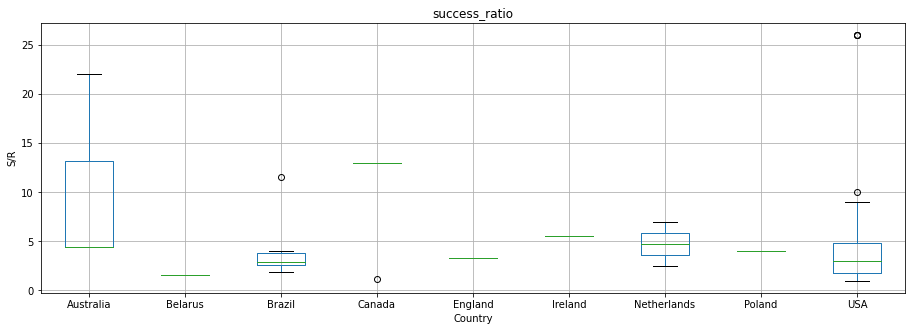

In [54]:
former_champs.boxplot(column = 'success_ratio', by='Country')
plt.ylabel('S/R')
plt.suptitle("")